## 各类别数据个数柱状图

### 导入工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 设置中文字体（选择对应的操作系统）

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

--2023-03-21 22:39:57--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  18.5MB/s    用时 0.5s    

2023-03-21 22:39:57 (18.5 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



### 导入数据集统计表格

In [4]:
df = pd.read_csv('数据量统计.csv')

In [5]:
df.shape

(4, 4)

In [6]:
df

,class,trainset,testset,total
0,body_broken,441.0,110.0,551.0
1,normal,717.0,179.0,896.0
2,side_broken,121.0,30.0,151.0
3,top_broken,137.0,34.0,171.0


### 图像数量柱状图可视化

In [7]:
# 指定可视化的特征
feature = 'total'
# feature = 'trainset'
# feature = 'testset'

In [8]:
df = df.sort_values(by=feature, ascending=False)

In [9]:
df.head()

,class,trainset,testset,total
1,normal,717.0,179.0,896.0
0,body_broken,441.0,110.0,551.0
3,top_broken,137.0,34.0,171.0
2,side_broken,121.0,30.0,151.0


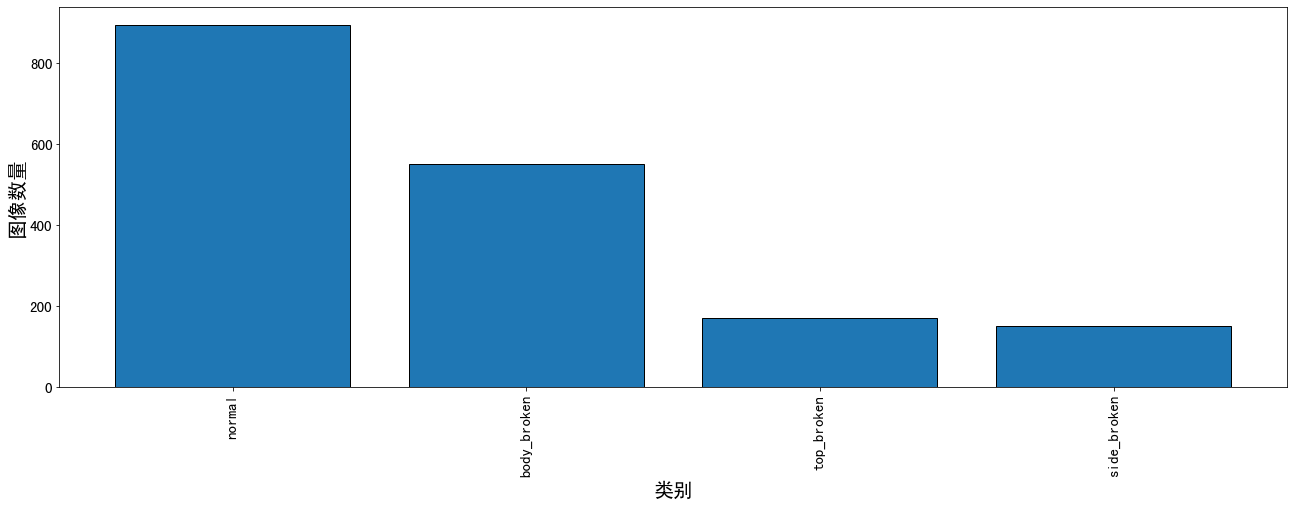

In [10]:
plt.figure(figsize=(22, 7))

x = df['class']
y = df[feature]

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)

# plt.savefig('各类别图片数量.pdf', dpi=120, bbox_inches='tight')

plt.show()

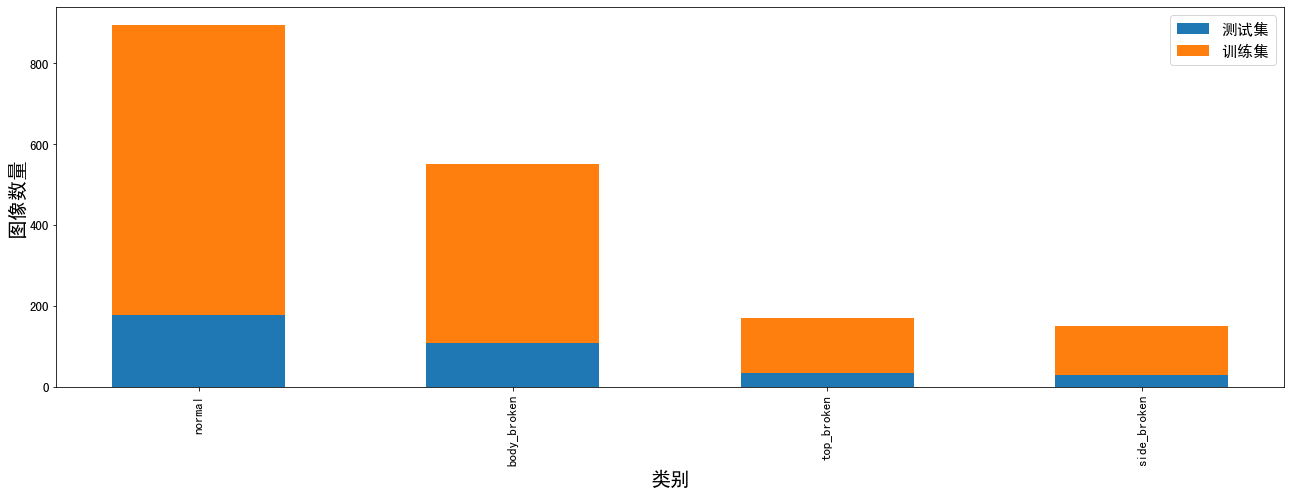

In [11]:
plt.figure(figsize=(22, 7))
x = df['class']
y1 = df['testset']
y2 = df['trainset']

width = 0.55 # 柱状图宽度

plt.xticks(rotation=90) # 横轴文字旋转

plt.bar(x, y1, width, label='测试集')
plt.bar(x, y2, width, label='训练集', bottom=y1)


plt.xlabel('类别', fontsize=20)
plt.ylabel('图像数量', fontsize=20)
plt.tick_params(labelsize=13) # 设置坐标文字大小

plt.legend(fontsize=16) # 图例

# 保存为高清的 pdf 文件
plt.savefig('各类别图像数量.pdf', dpi=120, bbox_inches='tight')

plt.show()